# Importing Libraries 

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report,confusion_matrix

# DATA PREPARATION

In [9]:
temp1=pd.read_excel(r'C:\Users\m_joekid\Desktop\just leave it here\Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name='Existing employees')
temp2=pd.read_excel(r'C:\Users\m_joekid\Desktop\just leave it here\Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name='Employees who have left')

In [10]:
temp1['attrition']=0
temp2['attrition']=1

In [11]:
df=pd.concat([temp1,temp2])

# VISUALIZATIONS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002136C1D3A88>,
      dtype=object)

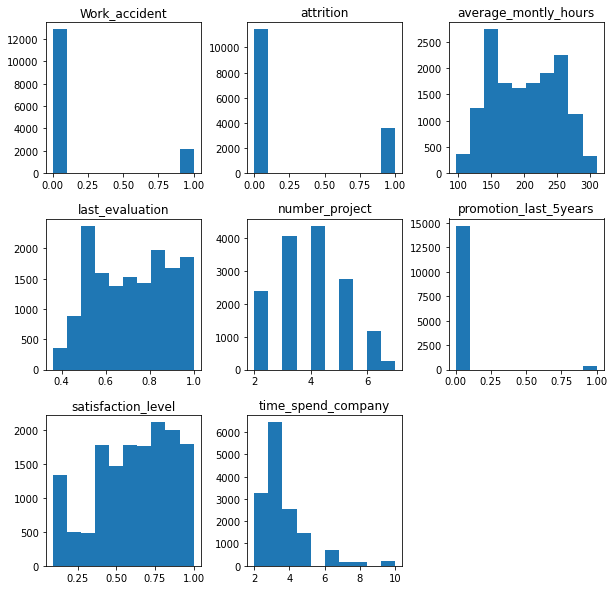

In [76]:
df.hist(figsize=(10,10),grid=False)

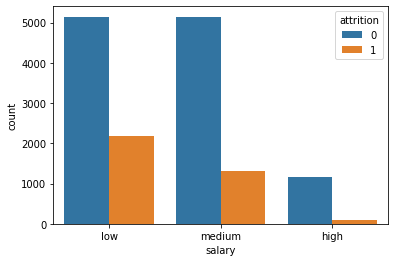

In [13]:
sns.countplot('salary',hue='attrition',data=df)

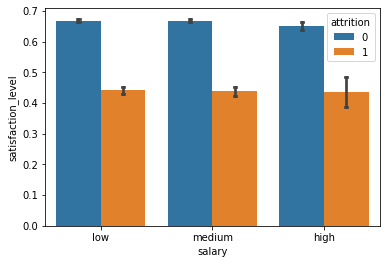

In [14]:
sns.barplot(x='salary',y='satisfaction_level',hue='attrition',data=df,capsize=.02)

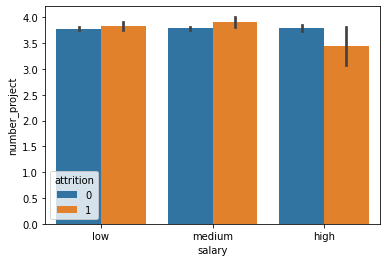

In [15]:
sns.barplot(x='salary',y='number_project',hue='attrition',data=df)

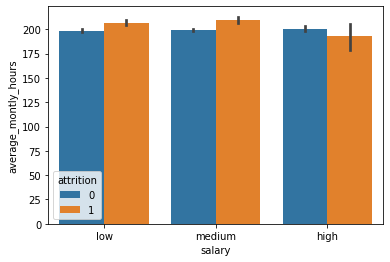

In [16]:
sns.barplot(x='salary',y='average_montly_hours',hue='attrition',data=df)

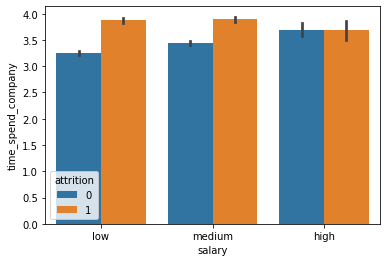

In [17]:
sns.barplot(x='salary',y='time_spend_company',hue='attrition',data=df)

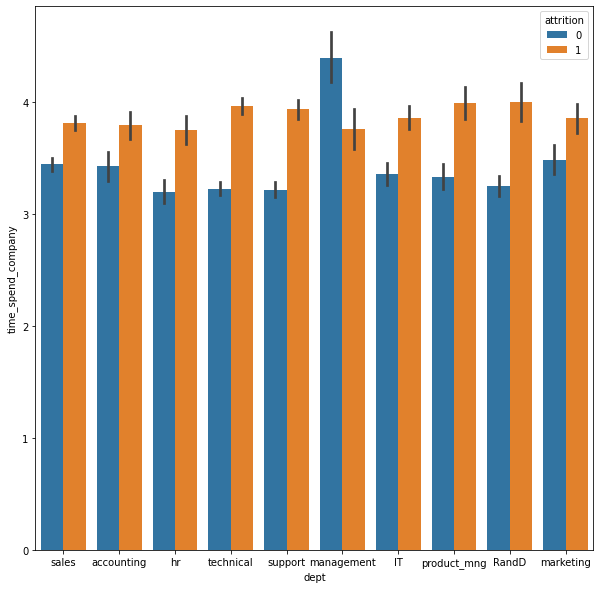

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(x='dept',y='time_spend_company',hue='attrition',data=df)

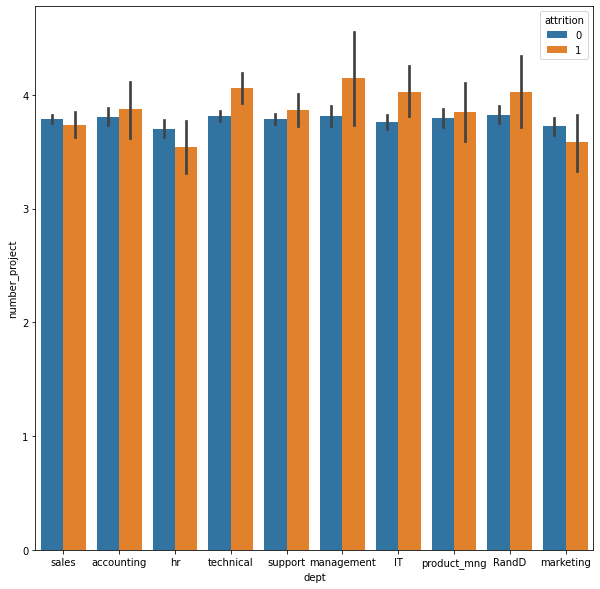

In [75]:
plt.figure(figsize=(10,10))
sns.barplot(x='dept',y='number_project',hue='attrition',data=df)

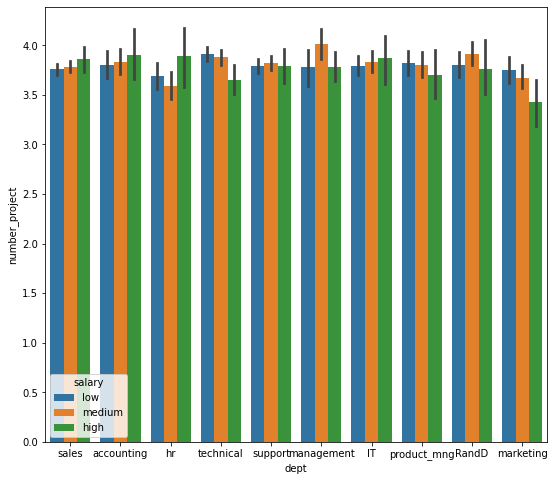

In [20]:
plt.figure(figsize=(9,8))
sns.barplot(x='dept',y='number_project',hue='salary',data=df)

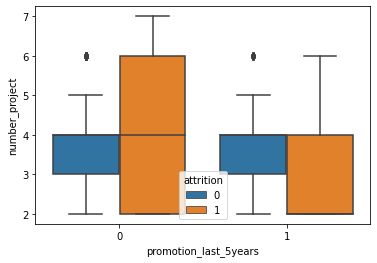

In [21]:
sns.boxplot(y='number_project',x='promotion_last_5years',hue='attrition',data=df)

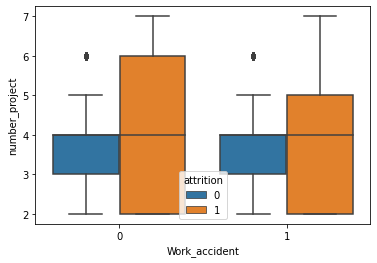

In [22]:
sns.boxplot(y='number_project',x='Work_accident',hue='attrition',data=df)

# Shallow Machine Learning

In [23]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['dept','salary']),remainder='passthrough')

In [24]:
del(df['Emp ID'])

In [25]:
poly=PolynomialFeatures(degree=3,include_bias=False)
logreg=LogisticRegression(class_weight='balanced')

In [26]:
pipeline=make_pipeline(column_trans,poly,logreg)

In [27]:
X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary',]]

In [62]:
y=df['attrition']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42,stratify=y)

In [29]:
#pipeline.fit(X_train,y_train)

In [30]:
#log_pred=pipeline.predict(X_test)

In [31]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
kf= KFold(n_splits=10,shuffle=True, random_state=1)
#skf=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
#cv_results=cross_val_score(pipeline, X, y,n_jobs=-1,scoring='accuracy',cv=kf)

In [32]:
#cv_results

In [33]:
#cv_results.mean()

In [34]:
#print (classification_report(y_test,log_pred))

In [35]:
#param_grid=[{'logisticregression__C':[1,10,100,1000],'logisticregression__penalty':['l1','l2']}]

In [36]:
#gs_log=GridSearchCV(pipeline,param_grid,n_jobs=-1,)

In [37]:
#gs_log.fit(X_train,y_train)

In [38]:
#grid_predict_log=gs_log.predict(X_test)

In [39]:
#print (classification_report(y_test,grid_predict_log))

In [40]:
#gs_log.best_params_

# RANDOM FOREST CLASSIFIER     

In [41]:
rndfrs=RandomForestClassifier(class_weight='balanced',n_jobs=-1,verbose=2)

In [42]:
forest_pipeline=make_pipeline(column_trans,rndfrs)

In [64]:
forest_pipeline.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100building tree 7 of 100

building tree 8 of 100building tree 9 of 100

building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100building tree 28 of 100building tree 29 of 100


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['dept', 'salary'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        verbose=2))])

In [65]:
forest_pred=forest_pipeline.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [66]:
print (classification_report(y_test,forest_pred))

precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.96      0.97      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [46]:
param_grid_forest=[{'randomforestclassifier__n_estimators':[200,500,1000,2000],'randomforestclassifier__criterion':['gini','entropy']}]

In [47]:
#gs_forest=GridSearchCV(forest_pipeline,param_grid_forest,return_train_score=True,cv=5)

In [48]:
#gs_forest.fit(X_train,y_train)

In [49]:
#gs_forest.best_params_

In [50]:
#gs_forest_pred=gs_forest.predict(X_test)

In [51]:
#print (classification_report(y_test,forest_pred))

In [52]:
#print (gs_forest.cv_results_['mean_test_score'])
#print (gs_forest.cv_results_['mean_train_score'])

In [53]:
from sklearn.model_selection import cross_validate

In [54]:
#cv_forest=cross_validate(forest_pipeline,X, y,n_jobs=-1,scoring='accuracy',cv=skf,return_train_score=True)

In [55]:
#print (cv_forest['train_score'])
#print (cv_forest['test_score'])


# DEEP LEARNING 

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [57]:
model=Sequential()

In [67]:
p_X_train=column_trans.fit_transform(X_train)
P_X_test=column_trans.transform(X_test)

In [59]:
scaler=StandardScaler()

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
model.add(Dense(512,input_dim=p_X_train.shape[1],activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(234,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(102,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
pn_X_train=scaler.fit_transform(np.asarray(p_X_train))
pn_X_test=scaler.transform(np.asarray(P_X_test))
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=10,verbose=1,restore_best_weights=True)
model.fit(pn_X_train,y_train,validation_data=(pn_X_test,y_test),callbacks=[monitor],epochs=20,batch_size=32)

Train on 10499 samples, validate on 4500 samples
Epoch 1/20
10499/10499 [==============================] - 14s 1ms/sample - loss: 0.5735 - accuracy: 0.7609 - val_loss: 0.5489 - val_accuracy: 0.7620
Epoch 2/20
10499/10499 [==============================] - 10s 957us/sample - loss: 0.5501 - accuracy: 0.7619 - val_loss: 0.5493 - val_accuracy: 0.7620
Epoch 3/20
10499/10499 [==============================] - 8s 797us/sample - loss: 0.5502 - accuracy: 0.7619 - val_loss: 0.5491 - val_accuracy: 0.7620
Epoch 4/20
10499/10499 [==============================] - 9s 811us/sample - loss: 0.5497 - accuracy: 0.7619 - val_loss: 0.5490 - val_accuracy: 0.7620
Epoch 5/20
10499/10499 [==============================] - 9s 823us/sample - loss: 0.5499 - accuracy: 0.7619 - val_loss: 0.5490 - val_accuracy: 0.7620
Epoch 6/20
10499/10499 [==============================] - 9s 811us/sample - loss: 0.5494 - accuracy: 0.7619 - val_loss: 0.5501 - val_accuracy: 0.7620
Epoch 7/20
10499/10499 [===========================